# **선형 회귀**

일반적인 선형 모델 : 입력 특성의 가중치 합 + 절편

 ![linear regression](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb4gFyY%2FbtsIJehWt8i%2F9sWO9TwHtBa2Ki6fvXdJu1%2Fimg.png)

벡터 형태

 ![vector form](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FkVPr9%2FbtsILfTCClD%2FuM0l5XmkSrZt5WYGou3Hi0%2Fimg.png)

 * 여기서 θ 는 row vector

## **비용함수와 정규방정식**

* 비용함수

 ![loss ft](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb9XM2i%2FbtsIK5jhX44%2FO2XMlQeve811KJj58laWGK%2Fimg.png)

* 비용함수를 최소화하는 ϴ 값을 찾기 위한 공식

 ![normal equation](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FVD1Gn%2FbtsIJtFNhAq%2FptV7noUin6KUSul7iT4uK1%2Fimg.png)

### **선형 회귀 수행 (np.linalg)**

넘파이의 linalg 모듈 내의 함수를 사용하여 직접 계산할 수 있음

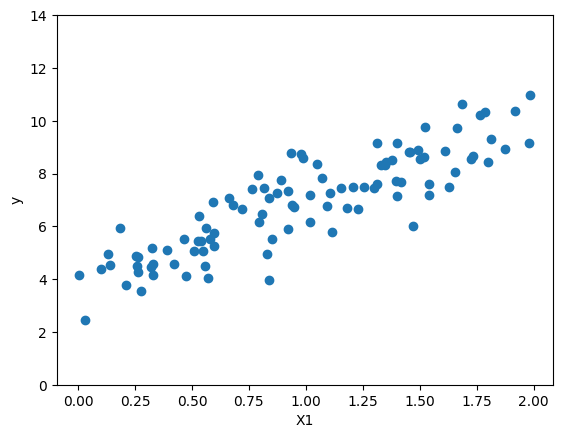

In [18]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

plt.ylim(0,14);plt.ylabel('y'); plt.xlabel('X1')
plt.scatter(X,y)

In [19]:
# design matrix 생성 (첫 칼럼을 모두 1로)
X_b = np.c_[np.ones((100,1)),X]

# 정규방정식 직접 계산
# np.linalg 모듈에 있는 inv(), dot() 메서드 활용
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [20]:
theta_best

array([[3.86191472],
       [3.08301965]])

*True theta0 = 4, theta1 = 3*

Gaussian noise(np.random.randn)로 인해 정확한 예측은 X

In [21]:
# 새로운 데이터 X_new에 대하여 예측
X_new = np.array([[0], [2]]) # 2x1 column vector
X_new_b = np.c_[np.ones((2,1)), X_new] # design matrix

# 모델의 예측값 생성 (2x1 matrix)
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86191472],
       [10.02795402]])

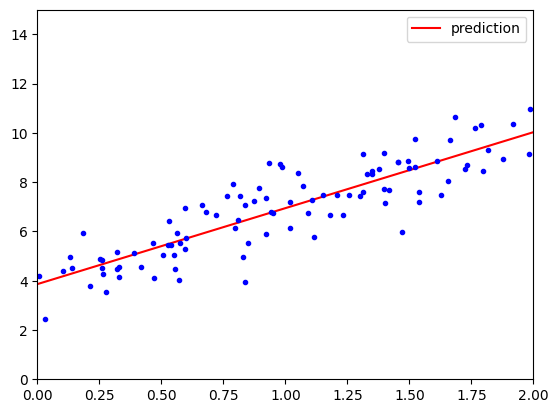

In [22]:
plt.plot(X_new, y_predict, 'r-', label='prediction')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])  # plt.axis([x_min, x_max, y_min, y_max])
plt.legend()
plt.show()

### **선형 회귀 수행 (sklearn)**

사용 모듈 : sklearn.linear_model.LinearRegression

사용 순서 : 선형 회귀 모델 생성 > 학습 > 예측

In [23]:
# 사이킷런에서의 선형회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [24]:
# 회귀 함수의 절편과 회귀 계수 출력
print(lin_reg.intercept_, lin_reg.coef_)

# 예측값 출력
print(lin_reg.predict(X_new))

[3.86191472] [[3.08301965]]
[[ 3.86191472]
 [10.02795402]]


In [25]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.86191472],
       [3.08301965]])

In [26]:
np.linalg.pinv(X_b).dot(y)

array([[3.86191472],
       [3.08301965]])

# **경사 하강법**

경사하강법 (Gradient Descent)
* 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
* 기본 아이디어 : 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것

경사하강법 과정
* 임의의 θ 값을 설정 (random initialization)
* 한 번에 조금씩 loss function이 감소하는 방향으로 진행
* 최솟값에 수렴할 때까지 점진적으로 향상
    * 이때 gradient = 0 이 되는 지점이 최솟값

 ![gradient descent](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FvKLoI%2FbtsIKCPsa70%2FR0henGxjEDWqBHUfMbcrC1%2Fimg.png)

주요 파라미터 : "스텝"의 크기
* learning rate 파라미터로 결정됨
* learning rate가 너무 작은 경우
    * 알고리즘이 수렴하기 위해 반복을 많이 진행해야 함 > 시간 소요 큼
* learning rate가 너무 큰 경우
    * 알고리즘을 더 큰 값으로 발산하게 만들 위험이 있음
    ![big learning rate](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FCBIOY%2FbtsIJYS1ok2%2FywYbKlCppXi3uLISTFW0kk%2Fimg.png)

경사 하강법을 사용할 떄에는 StandardScaler 등을 사용하여 모든 특성이 같은 스케일을 갖도록 만들어야함!!

모든 특성의 스케일이 같지 않으면 수렴하는 데 훨씬 오랜 시간이 걸림


## **배치 경사 하강법**

경사 하강법을 구현하기 위해서는 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 그래디언트를 계산해야함.

즉, $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야함 => *편도 함수 (Partial derivative)*

**비용 함수의 편도함수**

$\frac{\partial}{\partial \theta_j} \text{MSE}(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \theta^T x^{(i)} - y^{(i)} \right) x_j^{(i)}$



**경사 하강법의 스텝**

$\theta^{\text{next step}} = \theta - \eta \nabla_{\theta} \text{MSE}(\theta)$

In [27]:
# 알고리즘 구현
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

print(theta)

[[3.86191472]
 [3.08301965]]


**여러가지 학습률에 대한 경사 하강법 결과**

(처음 10개의 결과를 나타냄)

![learning rate](https://velog.velcdn.com/images/cha-suyeon/post/af47be77-11d9-4252-99d8-6f713ced7a28/image.png)

배치 경사 하강법의 장/단점

* 장점 : 비용 함수가 볼록 함수이고 기울기가 급격하게 바뀌지 않는 경우 (MSE loss function 같은), 학습률을 고정한 배치 경사 하강법은 결국 최적의 솔루션에 수렴함

* 단점 : 매 스텝에서 전체 훈련 세트를 사용하여 그래디언트를 계산함

    \> 훈련세트가 커지면 수행 속도가 매우 느려짐

## **확률적 경사 하강법**

매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산함

\> 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 알고리즘이 훨씬 빠름 (배치 경사 하강법에 비해)

**단점**

'확률적(=무작위)' 이기 때문에 알고리즘이 불안정함
* 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 X, 요동치면서 평균적으로 감소함 > 결과적으로는 최솟값에 근접하겠지만 요동이 지속되면서 최솟값에 안착하지는 못할 것 (최선o, 최고x)

**장점**

비용함수가 불규칙한 경우에는 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와줌 > 전역 최솟값을 찾을 가능성이 높음 (배치 경사하강법보다)

* <-> 무작위성은 지역 최솟값에서 탈출시켜주지만 전역 최솟값에는 다다르지 못 하게 함.
    * 이를 해결하기 위해서는 학습률을 점진적으로 감소시키면 됨
    * 시작할 때 : 학습률을 크게 잡아 지역 최솟값에 빠지지 않게 함
    * 점점 학습률을 감소시키며 전역 최솟값에 도달하게 함
    * 매 반복에서 학습률을 결정하는 함수 : **학습 스케줄(learning schedule)**

In [28]:
# 학습 스케줄을 사용한 확률적 경사 하강법 구현
n_epochs = 50
t0, t1 = 5, 50   # learning schedule hyper-parameter

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)   # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients

일반적으로 한 반복에서 m번(m = 훈련 세트의 샘플 수) 되풀이 됨. 이때 각 반복을 epoch 라고 함

In [29]:
theta

array([[3.786914  ],
       [3.12471905]])

In [30]:
# 사이킷런의 SGDRegressor 모듈로 구현
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.87249822]), array([3.10294379]))

## **미니배치 경사 하강법**

'미니배치'라 부르는 임의의 작은 샘플 세트에 대하여 그래디언트를 계산함

각 경사 하강법 알고리즘이 훈련 과정동안 파라미터 공간에서 움직인 경로

![mini batch](https://velog.velcdn.com/images/cha-suyeon/post/5165f457-7a79-4298-92ec-ada2a6be520b/image.png)

* 배치 경사하강법 : 실제로 최솟값에서 멈춤, ⓑ 시간 소요 ↑
* 확률적 경사 하강법 / 미니배치 경사 하강법 : 근처에서 맴돌고 있음
    * 적절한 학습 스케줄 사용 시 최솟값에 도달할 수 있음

# **다항 회귀**

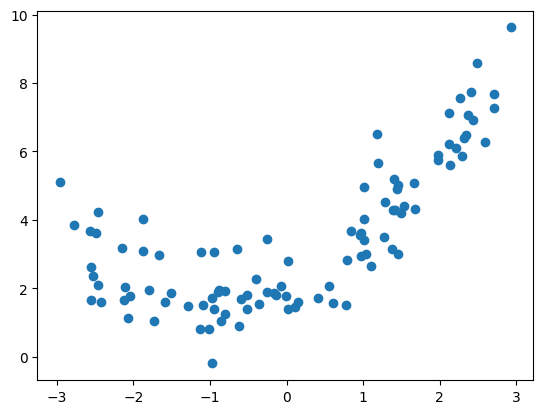

In [50]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.scatter(X, y)

PolynomialFeatures()를 사용해 훈련 데이터를 변환할 수 있음
* degree : 다항 회귀 모델의 차수, default는 2
* include_bias : bias를 위한 x0(=1)의 추가 여부를 설정, default = True

In [51]:
from sklearn.preprocessing import PolynomialFeatures

# 피처가 X 1개 이므로 PolynomialFeatures(degree=2) 수행 시 X => X, X^2로 변환됨
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0], X_poly[0])

[1.65626536] [1.65626536 2.74321493]


In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# 다항 회귀 모델의 절편, 회귀 계수 확인
lin_reg.intercept_, lin_reg.coef_

(array([2.02545695]), array([[0.88801121, 0.50311242]]))

<ipython-input-53-a686dded23c7>:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X, lin_reg.predict(X_poly), 'r.', marker='x', label='prediction')


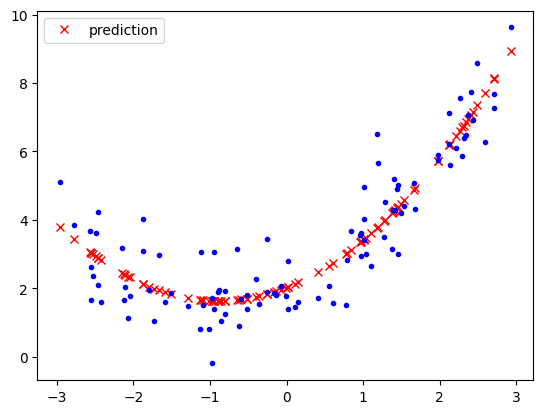

In [53]:
# 시각화
plt.plot(X, lin_reg.predict(X_poly), 'r.', marker='x', label='prediction')
plt.legend()
plt.plot(X, y, 'b.')

특성이 여러 개일 때 다항 회귀는 특성 간의 관계를 찾을 수 있음

이는 PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문임
* ex) 두 개의 특성 a, b를 degree=3으로 변환하면 $a^2,a^3,b^2,b^3$ 뿐 아니라 $ab, a^2b,ab^2$까지 특성으로 추가함

# **학습 곡선**

고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려고 함 >> 과대적합(overfitting)의 문제가 있음

하지만 선형 모델은 과소적합임

![over/under fitting](https://velog.velcdn.com/images/cha-suyeon/post/fc9f287e-4c1b-4ad0-898a-1baaf2327ad6/image.png)

얼마나 복잡한 모델을 사용할지 결정하는 것 + 모델이 데이터에 과대/과소적합 되었는지 확인하는 것이 중요함

* 교차 검증 : 모델의 일반화 성능을 추정할 수 있음
    * 훈련 데이터에서는 성능이 좋지만 교차 검증 점수가 나쁨 : over-fitting
    * 양쪽에 모두 좋지 않은 점수 : under-fitting

* 학습 곡선
    * 훈련 세트와 검증 세트의 모델 성능을 함수로 나타냄

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train set')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='validation set')
    plt.legend()

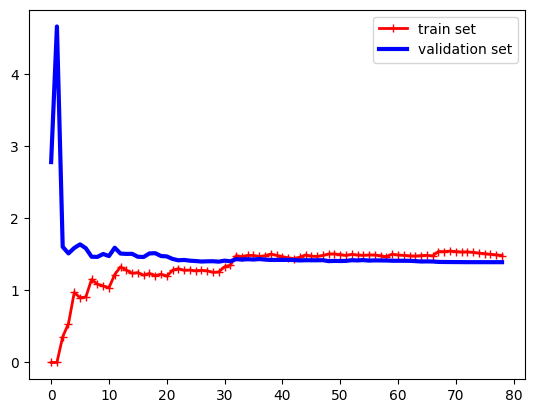

In [55]:
# 단순 선형 회귀 모델의 학습 곡선
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

과소적합 모델의 전형적인 학습 곡선 : 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있음

* 모델이 훈련 데이터에 과소적합되어있다면 훈련 샘플을 추가하더라도 효과가 X, 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야함

(True model : 이차함수 형태)

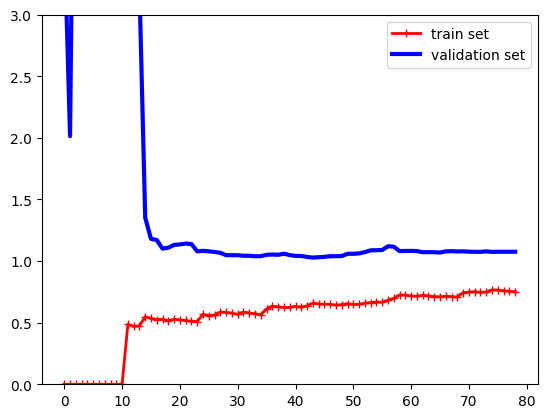

In [56]:
# 10차 다항 회귀모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
                                  ('lin_reg',LinearRegression())])

plt.ylim(0,3)
plot_learning_curves(polynomial_regression, X, y)

과대적합 모델의 특징 : 두 곡선 사이에 공간이 있음. 즉, 훈련 데이터에서의 성능이 검증 데이터에서보다 훨씬 낫다는 의미

* 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
* 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐
